In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import sympy as sy

In [ ]:
def arrayPlot(array,vmin=0,vmax=None):
    """A python version of the ArrayPlot[] function in Mathematica"""
    fig, ax = plt.subplots()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(array,cmap='Greys',vmin=vmin,vmax=vmax)
    plt.show()
def netMagnetization(config):
  """Python version of the first netMagnetization[] function Schrier writes"""
  total = 0
  for row in config:
      for element in row:
          total+= element
  return total
def netMagnetization(config):
    """Python version of the second netMagnetization[] function Schrier writes
    automatically includes summation over all levels of the array"""
    return np.sum(config)
def netMagnetizationPerSpin(config):
  """Python version of net magnetization function"""
  return netMagnetization(config)/len(config)**2
def energyIsing2D(config,J,B):
    """
    Function for calculating the energy of an Ising Model.
    Requires a config (the Ising Model in question), a value of J (interaction parameter)
    and a value for B (external field parameter)
    """
    energyB,energyJ = 0,0 # Initializes local variables
    for row in range(len(config)): # Loop over rows
        for col in range(len(config)): # Simultaneously loop over columns
            energyB += B*config[row,col]
            if row>0: # Up
                energyJ += J*config[row-1,col]*config[row,col]
            if row<len(config)-1: # Down
                energyJ += J*config[row+1,col]*config[row,col]
            if col>0: # Left
                energyJ += J*config[row,col-1]*config[row,col]
            if col<len(config)-1: # Right
                energyJ += J*config[row,col+1]*config[row,col]
    return energyB + energyJ/2 # Removes double counting
def energyPerSpin(config,J,B,energyFunction):
    """"calculate the energy per spin based on a
    particular ising model configuation "config",
    an interaction parameter "J"
    an external field parameter "B"
    and a function for calculating the energy"""
    return energyFunction(config,J,B)/len(config)**2
def MCstep(kT,J,B,config):
    """functions for taking a single Monte Carlo step"""
    newConfig = config.copy() #def local variables
    row,col = np.random.randint(0,len(config),2) #pick random spin

    #calculate the energy **before the change**
    Estart = config[row,col]*B
    if row>0: # Up
        Estart += J*config[row-1,col]*config[row,col]
    if row<len(config)-1: # Down
        Estart += J*config[row+1,col]*config[row,col]
    if col>0: # Left
        Estart += J*config[row,col-1]*config[row,col]
    if col<len(config)-1: # Right
        Estart += J*config[row,col+1]*config[row,col]

    #a single spin flip multiplies the local energy by -1
    Eend = -Estart
    if Eend < Estart: #did energy decrease?
      newConfig[row,col] *= -1 # Then flip the spin
    else:
      if np.random.random() <= np.exp(-(Eend-Estart)/kT): # If a random number is less than the probability
        newConfig[row,col] *= -1 # Then flip the spin

    return newConfig

def runMCmovie(kT,J,B,MCstepFunction, ax):
    """a python version of the runMCmovie function"""
    nSize = 10
    checkerboardConfig = np.array([[(-1)**(row+col) for row in range(nSize)] for col in range(nSize)])
    config = checkerboardConfig.copy()
    trajectory = []
    for i in range(1500):
        config = MCstepFunction(kT,J,B,config)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        arrayplot = [ax.imshow(config,cmap='Greys',
                               vmin=-1,vmax=1, animated=True)]
        print(arrayplot)
        trajectory.append(arrayplot)
    return trajectory #a list of arrayplot outputs
def runMC(kT, J, B, nEquil, nDataCol, sampleInterval, config, MCstepFunction, energyFunction):
    """function to run the Ising model MC simulation and collectsamples"""
    Esamples = []
    Msamples = []
    newConfig = config.copy()
    for i in range(nEquil):
        newConfig = MCstepFunction(kT, J, B, newConfig)
    for i in range(nDataCol):
        newConfig = MCstepFunction(kT, J, B, newConfig)
        if i % sampleInterval == 0:
            Esamples.append(energyFunction(newConfig,J,B))
            Msamples.append(abs(netMagnetizationPerSpin(newConfig)))
    Esamples = np.array(Esamples)
    Msamples = np.array(Msamples)
    return [Esamples.mean()/len(config)**2, # Mean Energy per spin
           Esamples.var()/(len(config)**2*kT**2), # Heat Capacity per spin
           Msamples.mean(), # Average net magnetization per spin
           newConfig] # The Final configuration
def MCstepPBC(kT,J,B,config):
    """MC step for Periodic Ising Model"""
    newConfig = config.copy()
    row,col = np.random.randint(0,len(config),2)
    Estart = config[row,col]*B
    if row>0: # Up
        Estart += J*config[row-1,col]*config[row,col] # Interior
    else:
        Estart += J*config[len(config)-1,col]*config[row,col] # Periodic boundary conditions
    if row<len(config)-1: # Down
        Estart += J*config[row+1,col]*config[row,col] # Interior
    else:
        Estart += J*config[0,col]*config[row,col] # Periodic boundary conditions
    if col>0: # Left
        Estart += J*config[row,col-1]*config[row,col] # Interior
    else:
        Estart += J*config[row,len(config)-1]*config[row,col] # Periodic boundary conditions
    if col<len(config)-1: # right
        Estart += J*config[row,col+1]*config[row,col] # Interior
    else:
        Estart += J*config[row,0]*config[row,col] # Periodic boundary conditions
    Eend = -Estart

    if Eend < Estart: #did energy decrease?
      newConfig[row,col] *= -1 # Then flip the spin
    else:
      if np.all(np.random.random() <= np.exp(-(Eend-Estart)/kT)): # If a random number is less than the probability
        newConfig[row,col] *= -1 # Then flip the spin

    return newConfig # Return the potentially altered array

# Below is the Code we are going to use for 13-7! 

In [ ]:
def MCstepPBC_1(kT,J,B,config):
    """MC step for Periodic Ising Model"""
    J = -1
    newConfig = config.copy()
    row,col = np.random.randint(0,len(config),2)
    Estart = config[row,col]*B
    if row>0: # Up
        Estart += J*config[row-1,col]*config[row,col] # Interior
    else:
        Estart += J*config[len(config)-1,col]*config[row,col] # Periodic boundary conditions
    if row<len(config)-1: # Down
        Estart += J*config[row+1,col]*config[row,col] # Interior
    else:
        Estart += J*config[0,col]*config[row,col] # Periodic boundary conditions

    if col>0: # Left
        Estart += J*config[row,col-1]*-config[row,col] # Interior
    else:
        Estart += J*config[row,len(config)-1]*-config[row,col] # Periodic boundary conditions
    if col<len(config)-1: # right
        Estart += J*config[row,col+1]*-config[row,col] # Interior
    else:
        Estart += J*config[row,0]*-config[row,col] # Periodic boundary conditions
    
    Eend = -Estart
    print(Eend)
    # print(np.exp(-(Eend-Estart)/kT))
    if Eend < Estart: #did energy decrease?
      newConfig[row,col] *= -1 # Then flip the spin
    else:
      if np.all(np.random.random() <= np.exp(-(Eend-Estart)/kT)): # If a random number is less than the probability
        newConfig[row,col] *= -1 # Then flip the spin

    return newConfig # Return the potentially altered array
def energyIsing2D(config,J,B):
    """
    Function for calculating the energy of an Ising Model.
    Requires a config (the Ising Model in question), a value of J (interaction parameter)
    and a value for B (external field parameter)
    """
    energyB,energyJ = 0,0 # Initializes local variables
    for row in range(len(config)): # Loop over rows
        for col in range(len(config)): # Simultaneously loop over columns
            energyB += B*config[row,col]
            if row>0: # Up
                energyJ += -1*config[row-1,col]*config[row,col] # Interior
            else:
                energyJ += -1*config[len(config)-1,col]*config[row,col] # Periodic boundary conditions
            if row<len(config)-1: # Down
                energyJ += -1*config[row+1,col]*config[row,col] # Interior
            else:
                energyJ += -1*config[0,col]*config[row,col] # Periodic boundary conditions
            if col>0: # Left
                energyJ += config[row,col-1]*-config[row,col] # Interior
            else:
                energyJ += config[row,len(config)-1]*-config[row,col] # Periodic boundary conditions
            if col<len(config)-1: # right
                energyJ += config[row,col+1]*-config[row,col] # Interior
            else:
                energyJ += config[row,0]*-config[row,col] # Periodic boundary conditions
    return energyB + energyJ/2 # Removes double counting

kT = np.linspace(1,4,10)
J = 0
B = 0
nEquil= 10000
nDataCol = 1000000
nSize = 10
config = np.array([[(-1)**np.random.randint(2) for i in range(nSize)] for j in range(nSize)])
sampleInterval = 10000
results = runMC(kT, J, B, nEquil, nDataCol, sampleInterval, config, MCstepPBC_1, energyIsing2D)

CHATGPT Idea of Alternating between J values

In [75]:
def energyIsing2DPBC_alternating(config,J, B):
    """Energy of an Ising model with Periodic Boundary Conditions and alternating interactions."""
    energyB = 0
    energyJ = 0
    for row in range(len(config)):
        for col in range(len(config)):
            # Determine the interaction value based on the row index
            J = 1 if row % 2 == 0 else -1

            energyB += B * config[row, col]

            # Interaction with the above cell
            energyJ += J * config[(row - 1) % len(config), col] * config[row, col]

            # Interaction with the below cell
            energyJ += J * config[(row + 1) % len(config), col] * config[row, col]

            # Interaction with the left cell
            energyJ += J * config[row, (col - 1) % len(config)] * config[row, col]

            # Interaction with the right cell
            energyJ += J * config[row, (col + 1) % len(config)] * config[row, col]

    return energyB + energyJ / 2  # Remove double counting and return the final result

def MCstepPBC_alternating(kT, J, B, config):
    """Monte Carlo step for an Ising model with Periodic Boundary Conditions and alternating interactions."""
    newConfig = config.copy()
    row, col = np.random.randint(0, len(config), 2)
    J = 1 if row % 2 == 0 else -1

    Estart = B * config[row, col]

    # Interaction with the above cell
    Estart += J * config[(row - 1) % len(config), col] * config[row, col]

    # Interaction with the below cell
    Estart += J * config[(row + 1) % len(config), col] * config[row, col]

    # Interaction with the left cell
    Estart += J * config[row, (col - 1) % len(config)] * config[row, col]

    # Interaction with the right cell
    Estart += J * config[row, (col + 1) % len(config)] * config[row, col]

    Eend = energyIsing2DPBC_alternating(newConfig, J, B)

    if Eend < Estart:  # did energy decrease?
        newConfig[row, col] *= -1  # Then flip the spin
    else:
        if np.all(np.random.random() <= np.exp(-(Eend - Estart) / kT)):
            newConfig[row, col] *= -1  # Then flip the spin

    return newConfig

kT = np.linspace(1,4,10)
J = 0
B = 0
nEquil= 10000
nDataCol = 1500000
nSize = 10
config = np.array([[(-1)**np.random.randint(2) for i in range(nSize)] for j in range(nSize)])
sampleInterval = 10000
results = runMC(kT, J, B, nEquil, nDataCol, sampleInterval, config, MCstepPBC_alternating, energyIsing2DPBC_alternating)

In [76]:
print(results)

[-0.0144, array([0.67259733, 0.378336  , 0.24213504, 0.16814933, 0.12353829,
       0.094584  , 0.07473304, 0.06053376, 0.0500279 , 0.04203733]), 0.07706666666666666, array([[ 1,  1, -1,  1,  1,  1, -1, -1, -1,  1],
       [ 1, -1,  1, -1,  1, -1, -1,  1, -1, -1],
       [ 1,  1, -1,  1,  1,  1, -1, -1,  1,  1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1,  1],
       [-1,  1,  1,  1,  1,  1,  1, -1,  1, -1],
       [-1, -1, -1,  1,  1, -1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1, -1,  1,  1,  1, -1],
       [ 1, -1, -1, -1, -1, -1, -1,  1, -1,  1],
       [ 1,  1, -1, -1,  1, -1, -1, -1,  1, -1],
       [ 1,  1, -1,  1, -1,  1, -1, -1, -1, -1]])]


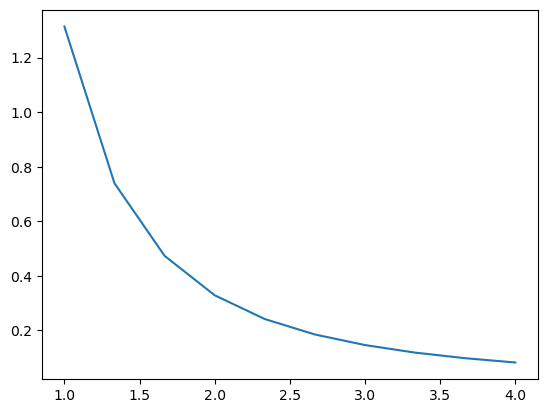

In [67]:
plt.plot(kT, results[1])

In [78]:
arrayPlot(results[3])

In [69]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import rc
rc('animation', html='jshtml')
fig, ax = plt.subplots()
images = runMCmovie(4,-1,0,MCstepPBC_alternating, ax)
ani = animation.ArtistAnimation(fig, images, interval=1000/50, blit=True,repeat_delay=500)

In [70]:
ani